# PhenoCam ROI Summary Files

Here's a python notebook demonstrating how to read in and plot an ROI (Region of Interest) summary using python.  In this case I'm using the 1-day summary file from the alligatorriver site.  The summary files are in CSV format and can be read directly from the site using a URL.  Before reading from a URL let's make sure we can read directly from a file.

In [1]:
%matplotlib inline

import os, sys
import numpy as np
import matplotlib
import pandas as pd
import requests
import StringIO

# set matplotlib  style
matplotlib.style.use('ggplot')

sitename = 'alligatorriver'
roiname = 'DB_0001'
infile = "{}_{}_1day.csv".format(sitename, roiname)
print infile

alligatorriver_DB_0001_1day.csv


In [2]:
%%bash
head -30 alligatorriver_DB_0001_1day.csv

#
# 1-day summary product time series for alligatorriver
#
# Site: alligatorriver
# Veg Type: DB
# ROI ID Number: 0001
# Lat: 35.7879
# Lon: -75.9038
# Elev: 1
# UTC Offset: -5
# Image Count Threshold: 1
# Aggregation Period: 1
# Solar Elevation Min: 5.0
# Time of Day Min: 00:00:00
# Time of Day Max: 23:59:59
# ROI Brightness Min: 100
# ROI Brightness Max: 665
# Creation Date: 2016-10-13
# Creation Time: 11:12:18
# Update Date: 2016-10-13
# Update Time: 11:12:21
#
date,year,doy,image_count,midday_filename,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,r_mean,r_std,g_mean,g_std,b_mean,b_std,gcc_mean,gcc_std,gcc_50,gcc_75,gcc_90,rcc_mean,rcc_std,rcc_50,rcc_75,rcc_90,max_solar_elev,snow_flag,outlierflag_gcc_mean,outlierflag_gcc_50,outlierflag_gcc_75,outlierflag_gcc_90
2012-05-03,2012,124,2,alligatorriver_2012_05_03_120110.jpg,106.30031,115.73730,55.34694,0.41724,0.38322,106.39446,0.09415,115.55613,0.18118,55.95246,0.60553,0.41581,0.00143,0.41581,0.41653,0.41696,0.38285,0.00038,0.38285,0

While the data can be read directly from a URL we'll start by doing the simple thing of reading the CSV file directly from our local disk.

In [3]:
with open(infile,'r') as fd:
    df = pd.read_csv(fd, comment='#', parse_dates=[0])

df.head()

,date,year,doy,image_count,midday_filename,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,...,rcc_std,rcc_50,rcc_75,rcc_90,max_solar_elev,snow_flag,outlierflag_gcc_mean,outlierflag_gcc_50,outlierflag_gcc_75,outlierflag_gcc_90
0,2012-05-03,2012,124,2,alligatorriver_2012_05_03_120110.jpg,106.30031,115.73730,55.34694,0.41724,0.38322,...,0.00038,0.38285,0.38304,0.38315,70.15241,NaN,NaN,NaN,NaN,NaN
1,2012-05-04,2012,125,0,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-05-05,2012,126,0,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-05-06,2012,127,18,alligatorriver_2012_05_06_120108.jpg,98.56315,114.36571,58.60785,0.42118,0.36298,...,0.01198,0.37316,0.37640,0.37951,71.00152,NaN,NaN,NaN,NaN,NaN
4,2012-05-07,2012,128,22,alligatorriver_2012_05_07_120109.jpg,104.66830,114.42699,57.99294,0.41296,0.37774,...,0.00392,0.37819,0.38044,0.38412,71.27531,NaN,NaN,NaN,NaN,NaN


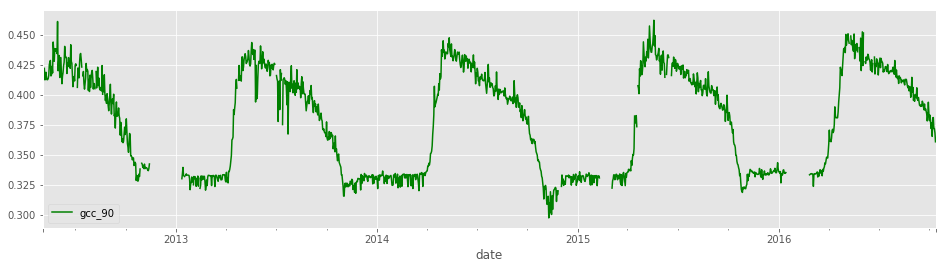

In [4]:
df.plot('date', ['gcc_90'], figsize=(16,4),
        grid=True, style=['g'] )


That was pretty simple.  Now try to read directly from a URL to see if we get the same result.  This has the advantage that you always get the latest version of the file which is updated nightly.

In [5]:
url = "https://phenocam.sr.unh.edu/data/archive/{}/ROI/{}_{}_1day.csv"
url = url.format(sitename, sitename, roiname)
print url

https://phenocam.sr.unh.edu/data/archive/alligatorriver/ROI/alligatorriver_DB_0001_1day.csv


Use the `requests` package to read the CSV file from the URL.

In [6]:
response = requests.get(url)
fd = StringIO.StringIO(response.text)
df = pd.read_csv(fd, comment='#', parse_dates=[0])
fd.close
df[0:5]

,date,year,doy,image_count,midday_filename,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,...,rcc_std,rcc_50,rcc_75,rcc_90,max_solar_elev,snow_flag,outlierflag_gcc_mean,outlierflag_gcc_50,outlierflag_gcc_75,outlierflag_gcc_90
0,2012-05-03,2012,124,2,alligatorriver_2012_05_03_120110.jpg,106.30031,115.73730,55.34694,0.41724,0.38322,...,0.00038,0.38285,0.38304,0.38315,70.15241,NaN,NaN,NaN,NaN,NaN
1,2012-05-04,2012,125,0,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-05-05,2012,126,0,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-05-06,2012,127,17,alligatorriver_2012_05_06_120108.jpg,98.56315,114.36571,58.60785,0.42118,0.36298,...,0.00954,0.37324,0.37641,0.37958,71.00152,NaN,NaN,NaN,NaN,NaN
4,2012-05-07,2012,128,21,alligatorriver_2012_05_07_120109.jpg,104.66830,114.42699,57.99294,0.41296,0.37774,...,0.00329,0.37774,0.38016,0.38301,71.27531,NaN,NaN,NaN,NaN,NaN


If necessary we'll need to convert nodata values.

In [7]:
df[df['gcc_90'] == -9999.].gcc_90 = np.nan

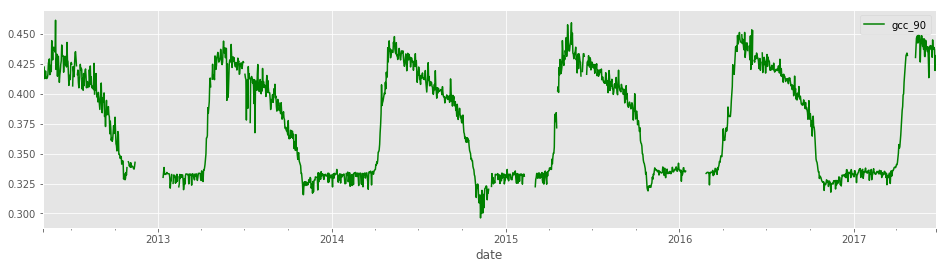

In [8]:
df.plot('date', ['gcc_90'], figsize=(16,4),
        grid=True, style=['g'] )



We can look at other columns and also filter the data in a variety of ways.  Recently we had a site where the number of images varied a lot over time.  Let's look at how consistent the number of images for the alligator river site.  The image_count reflects our brightness threshold which will eliminate images in the winter time when the days are shorter.  But there are a number of other ways the image count can be reduced.  The ability reliably extract a 90^th precentile value is dependent on the number of images available for a particular summary period.

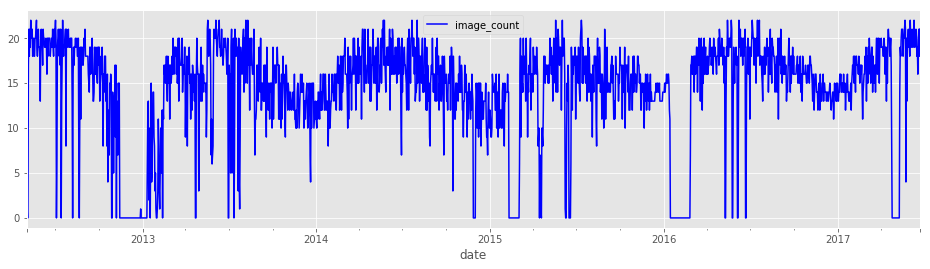

In [9]:
df.plot('date','image_count', figsize=(16,4), style='b')

One possibility would be to filter the data for summary periods which had at least 10 images.  

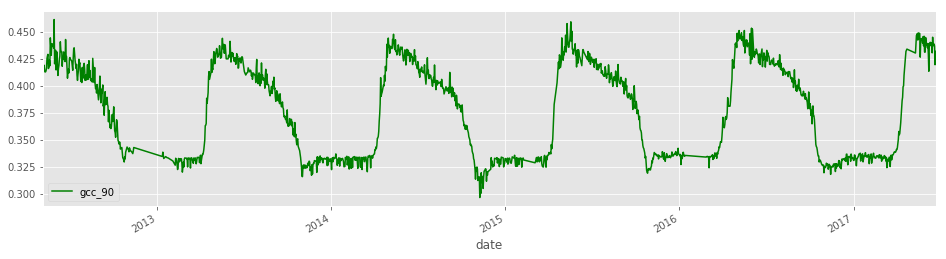

In [10]:
df10 = df[df['image_count'] >= 10]
df10.plot('date', ['gcc_90'], figsize=(16,4),
        grid=True, style=['g'] )

This looks a little cleaner especially for the 2013 season. 